In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import readNetwork as rn

#matplotlib関連
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import glob

In [5]:
dir_name = '_sampleData'
net_name = 'SiouxFalls_13'
scene_name = 'scenario_3'

# Assume you have not changed the relative paths after cloning the repository
root = os.path.dirname(os.path.abspath('.'))
root = os.path.join(root, '..', dir_name, net_name, scene_name)
# root

output_root = os.path.join(root, 'result', 'FISTA_LOGIT', 'img')
os.makedirs(output_root, exist_ok=True)

In [11]:
df = rn.read_node(os.path.join(root, '..', 'netname_node.tntp'.replace('netname', net_name)))
original_net = rn.read_net(os.path.join(root, '..', 'netname_net.tntp'.replace('netname', net_name)))
# df

# 座標リストの作成
try:
    pos = {i: [df['X'][i], df['Y'][i]] for i in df.index}  # 元データが大文字か
except KeyError:
    pos = {i: (df['x'][i], df['y'][i]) for i in df.index}  # 小文字か

pos


{1: [0.0, 35.0],
 2: [18.0, 35.0],
 3: [6.0, 30.0],
 4: [12.0, 30.0],
 5: [12.0, 20.0],
 6: [6.0, 20.0],
 7: [0.0, 0.0],
 8: [6.0, 10.0],
 9: [12.0, 10.0],
 10: [18.0, 10.0],
 11: [18.0, 0.0],
 12: [12.0, 0.0],
 13: [6.0, 0.0],
 14: [0.0, 30.0],
 15: [18.0, 30.0],
 16: [24.0, 25.0],
 17: [18.0, 25.0],
 18: [12.0, 25.0],
 19: [0.0, 20.0],
 20: [18.0, 20.0],
 21: [18.0, 15.0],
 22: [24.0, 20.0],
 23: [12.0, 5.0],
 24: [6.0, 5.0]}

AttributeError: 'AxesSubplot' object has no attribute 'nx'

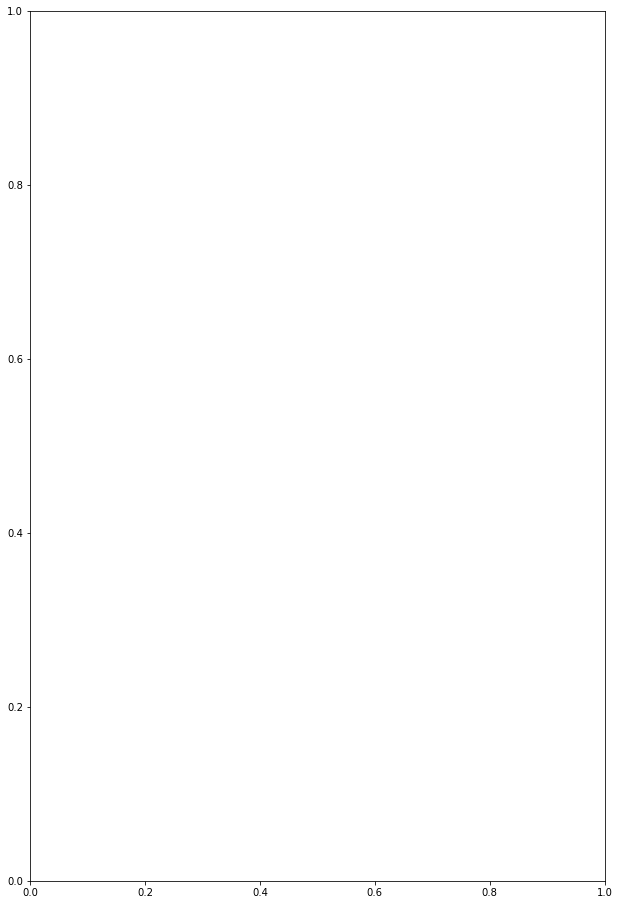

<Figure size 2520x1152 with 0 Axes>

In [15]:
# データの読込 & 解の挿入
net = rn.read_net(os.path.join(root, 'virtual_net', 'vehicle', '0', 'netname_vir_net.tntp'.replace('netname', net_name)))
sol_flow = np.loadtxt(os.path.join(root, 'result', 'FISTA_LOGIT', 'solFlow.csv'))
net['sol_flow'] = sol_flow[:len(net)]
max_flow = max(list(net['sol_flow']))

# zones = [1, 2, 4, 5, 10, 11, 14, 15, 19, 13, 24, 21, 20]
node_colors = [(0.7, 0.7, 0.7) for i in range(24)]
# for i in zones:
#     node_colors[i-1] = (0, 0, 0.4, 0.5)
# for i in range(13):
#     node_colors[i] = (0, 0, 0.4, 0.5)

# 図の作成
for vehicle_state in range(max(list(net['vehicle_state']))+1):

    temp_root = os.path.join(output_root, 'vehicle_state_vs'.replace('vs', str(vehicle_state)))
    os.makedirs(temp_root, exist_ok=True)

    for time in range(max(list(net['time']))+1):

        links = net[(net['vehicle_state'] == vehicle_state) & (net['time'] == time) & (net['original_link'] != -1)]

        # networkX のグラフの作り方
        G = nx.DiGraph()
        for index, link in links.iterrows():
            G.add_edge(original_net['init_node'][link['original_link']], original_net['term_node'][link['original_link']])
        
        
        # networkX 内にグラフ描画機能があるのでそれを使う
        value = list(links['sol_flow'] / max_flow)
        edge_color = []
        edge_width = []
        arrow_size = []
        for i in range(len(value)):
            # edge_color.append((value[i], value[i], 1.0, 0.5 + 0.5*value[i]))
            edge_color.append((0.9-0.9*(1.0-(1.0-value[i])**10), 0.9-0.9*(1.0-(1.0-value[i])**10) , 1.0))
            edge_width.append(0.1 + value[i]*50)
            arrow_size.append(20*value[i])
            # edge_color.append((1.0, 1.0, 1.0))


        plt.figure(figsize = (12, 16))
        # nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color=value, node_color=(0.7, 0.7, 0.7), width=edge_width, node_size=350, font_size=12, edge_cmap=plt.cm.Blues)
        nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=20, edge_color=edge_color, node_color=node_colors, width=edge_width, node_size=700, font_size=24, connectionstyle='arc3, rad=0.15')
        plt.axis('off')
        plt.savefig(os.path.join(temp_root, 'time_ttmm.png'.replace('ttmm', str(time))))
        plt.close()


    # files = sorted(glob.glob(os.path.join(temp_root, '*.png')))
    # images = list(map(lambda file : Image.open(file) , files))
    # images[0].save(os.path.join(output_root, 'vehicle_state_vs.gif'.replace('vs', str(vehicle_state))), save_all=True,append_images=images[1:], duration=100, loop=0)

    img_files = glob.glob(os.path.join(temp_root, '*.png'))
    files = []
    for i in range(len(img_files)):
        files.append(os.path.join(temp_root, 'time_ttmm.png'.replace('ttmm', str(i))))
    images = list(map(lambda file : Image.open(file) , files))
    images[0].save(os.path.join(output_root, 'vehicle_state_vs.gif'.replace('vs', str(vehicle_state))), save_all=True,append_images=images[1:], duration=10, loop=0)

In [116]:
files = sorted(glob.glob(os.path.join(temp_root, '*.png')))
images = list(map(lambda file : Image.open(file) , files))
images[0].save(os.path.join(output_root, 'vehicle_state_vs.gif'.replace('vs', str(vehicle_state))), save_all=True,append_images=images[1:], duration=10, loop=0)

### 下は試しに作ったやつ

In [44]:
net = rn.read_net(os.path.join(root, 'virtual_net', 'vehicle', '0', 'netname_vir_net.tntp'.replace('netname', net_name)))
# print(net)

In [50]:
sol_flow = np.loadtxt(os.path.join(root, 'result', 'FISTA_LOGIT', 'solFlow.csv'))

In [54]:
net['sol_flow'] = sol_flow[:len(net)]
max_flow = max(list(net['sol_flow']))

In [59]:
links = net[(net['vehicle_state'] == 1) & (net['time'] == 10) & (net['original_link'] != -1)]
print(links)

# networkX のグラフの作り方
G = nx.DiGraph()
for index, link in links.iterrows():
    G.add_edge(original_net['init_node'][link['original_link']], original_net['term_node'][link['original_link']])

# print(G.nodes)

      init_node  term_node  free_flow_time  original_link  time  \
2204        725        751             7.0              0    10   
2205        725        752             5.0              1    10   
2206        726        769             7.0              2    10   
2207        726        770             6.0              3    10   
2208        726        768             5.0              4    10   
...         ...        ...             ...            ...   ...   
2275        747        770             5.0             71    10   
2276        747        772             3.0             72    10   
2277        748        769             4.0             73    10   
2278        748        762             5.0             74    10   
2279        748        771             3.0             75    10   

      original_ts_link  vehicle_state  link_type  price_index      sol_flow  
2204               760              1          1            1  5.286020e-01  
2205               761              1  

In [60]:
# 座標リストの作成
try:
    pos = {i: [df['X'][i], df['Y'][i]] for i in df.index}  # 元データが大文字か
except KeyError:
    pos = {i: (df['x'][i], df['y'][i]) for i in df.index}  # 小文字か

# pos


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


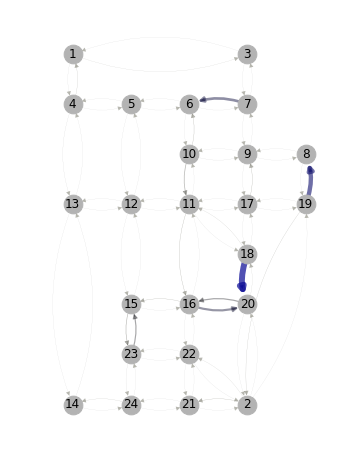

In [95]:
# networkX 内にグラフ描画機能があるのでそれを使う
value = list(links['sol_flow'] / max_flow)
edge_color = []
edge_width = []
for i in range(len(value)):
    # edge_color.append((value[i], value[i], 1.0, 0.5 + 0.5*value[i]))
    edge_color.append((0.1-0.1*value[i], 0.1-0.1*value[i] , value[i], 0.3 + 0.7*value[i]))
    edge_width.append(0.1 + value[i]*10)
    # edge_color.append((1.0, 1.0, 1.0))


plt.figure(figsize = (6, 8))
# nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color=value, node_color=(0.7, 0.7, 0.7), width=edge_width, node_size=350, font_size=12, edge_cmap=plt.cm.Blues)
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color=edge_color, node_color=(0.7, 0.7, 0.7), width=edge_width, node_size=350, font_size=12, connectionstyle='arc3, rad=0.2')
plt.axis('off')
plt.show()


ValueError: Invalid RGBA argument: 6.0

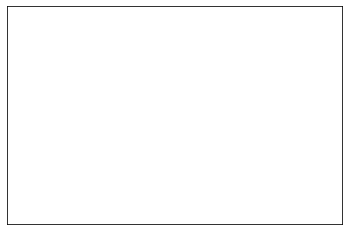

In [32]:
color = net['free_flow_time']
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure()
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=15, edge_color=color, node_color="w", width=2, node_size=1000, font_size=12)
plt.axis('off')
plt.show()
